In [1]:
import sys
sys.path.append('../')
import mobipy
from mobipy import conc
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyc_model.txt', 'models/simplyq_data.dat')
app.run()

compose begin
State var registration begin.
Generate fluxes for dissolved quantities.
Function tree resolution begin.
Generate state vars for aggregates.
Generate state vars for in_flux_neighbor.
Generate state vars for in_flux.
Input dates: 1981-01-01 2010-10957-1475686672 10957
Model application set up with data.
Create instruction arrays
Instruction codegen
Resolve index sets dependencies begin.
Propagate solvers
Remove ode dependencies
Sorting begin
Create batches
Sort initial.
Build pre batches.

**** batch structure ****
  discrete :
	[]
		"Precipitation falling as snow"
		"Snow depth" += "Precipitation falling as snow"
		"Melt"
		"Snow depth" -= "Melt"
		"Refreeze"
		"Snow depth" += "Refreeze"
		"Snow depth"
		"Snow water" += "Melt"
		"Snow water" -= "Refreeze"
		"Melt runoff"
		"Snow water" -= "Melt runoff"
		"Snow water"
		"Precipitation falling as rain"
		"in_flux"
		"Potential evapotranspiration"
		"conc(Deep soil DOC)"
	["Landscape units" ]
		"COUP soil temperature"
		"Soil

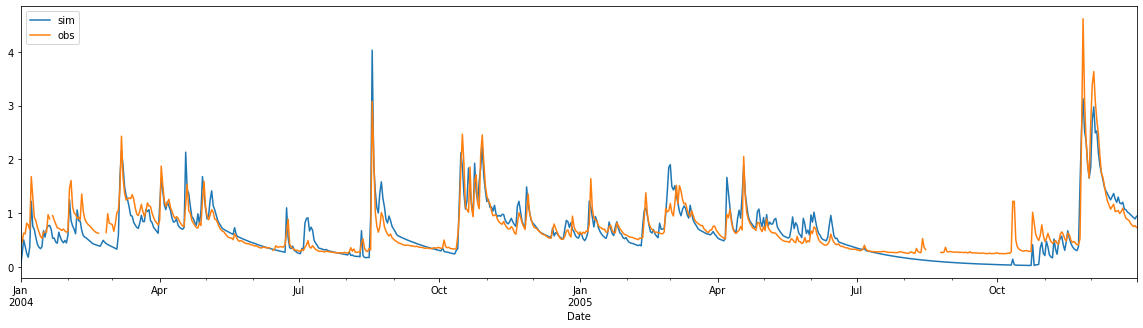

In [3]:
sim = app.rw.river.flow[["Coull"]]
obs = app.additional_series("observed Q")[[]]

obs = obs[sim.index]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

sim.plot(ax=ax, label='sim')
obs.plot(ax=ax, label='obs')
ax.legend()

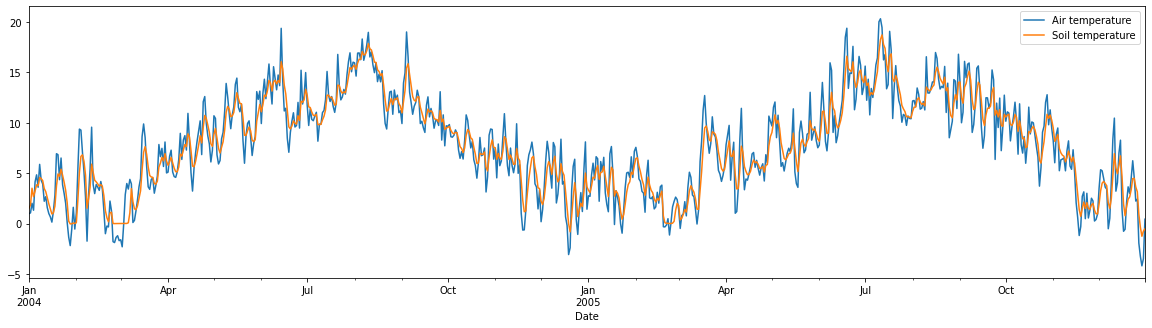

In [3]:
air_temp = app.sn.air.temp[[]]
soil_temp = app.st.soil.temp[['Arable']]

air_temp = air_temp[soil_temp.index]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

air_temp.plot(ax=ax)
soil_temp.plot(ax=ax)
ax.legend()

begin model run.
got past allocation
begin run
Run time: 28 milliseconds, 53351617 cycles.



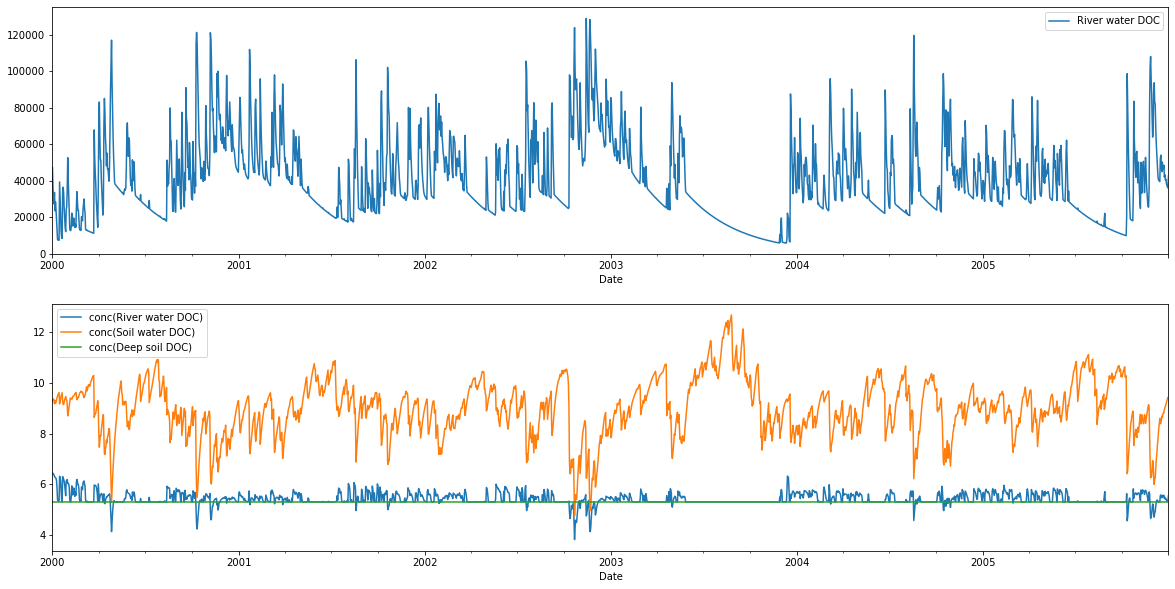

In [4]:

app.sc.gwdocconc[[]] = 5.3
app.run()

river_doc      = app.river.water.oc[["Coull"]]
river_doc_conc = conc(app.river.water.oc)[["Coull"]]
soil_doc_conc  = conc(app.soil.water.oc)[["Arable"]]
gw_doc_conc    = conc(app.gw.water.oc)[[]]

fig,ax = plt.subplots(2,1)
fig.set_size_inches(20,10)

river_doc.plot(ax=ax[0])
river_doc_conc.plot(ax=ax[1])
soil_doc_conc.plot(ax=ax[1])
gw_doc_conc.plot(ax=ax[1])
ax[0].legend()
ax[1].legend()

begin model run.
got past allocation
begin run
Run time: 21 milliseconds, 41682151 cycles.



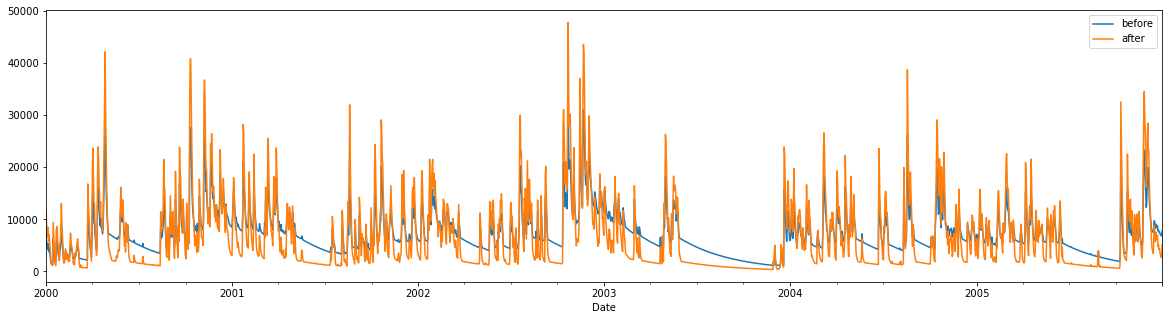

In [6]:
before = app.river.water[["Coull"]]     # Read the time series of river.water (volume)
app.sw.bfi[[]] = 0.1                    # Set base flow index to 0.1
app.sw.tc_s[['Arable']] = 5             # Set water time constant for Arable land class to 5
app.run()
after = app.river.water[["Coull"]]      # Read the time series again.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

before.plot(ax=ax, label='before')
after.plot(ax=ax, label='after')
ax.legend()

In [7]:
import sys
sys.path.append('../')
import mobipy
from mobipy import conc
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyp_model.txt', 'models/simplyp_data.dat')
app.run()

<AxesSubplot:xlabel='Date'>

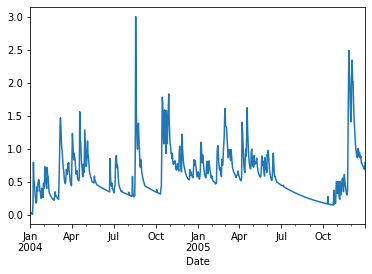

In [3]:
app.rw.river.flow[["Coull"]].plot()

<AxesSubplot:xlabel='Date'>

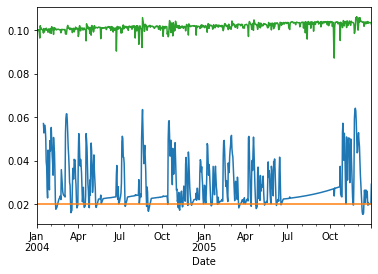

In [8]:
(conc(app.river.water.tdp)[["Coull"]]*1000)[15:].plot()
conc(app.gw.water.tdp)[[]].plot()
conc(app.soil.water.tdp)[["Arable"]].plot()

<AxesSubplot:xlabel='Date'>

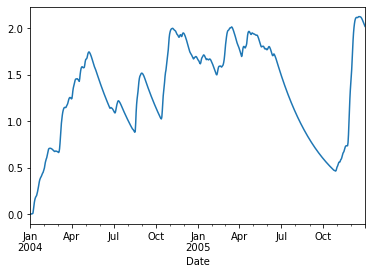

In [5]:
app.gw.water.tdp[["Coull"]].plot()

<AxesSubplot:xlabel='Date'>

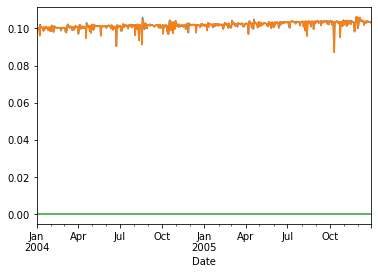

In [9]:
#app.soil.plab[["Arable"]].plot()
conc(app.soil.water.tdp)[["Arable"]].plot()
conc(app.soil.water.tdp)[["Improved grasslands"]].plot()
conc(app.soil.water.tdp)[["Semi-natural"]].plot()

<AxesSubplot:xlabel='Date'>

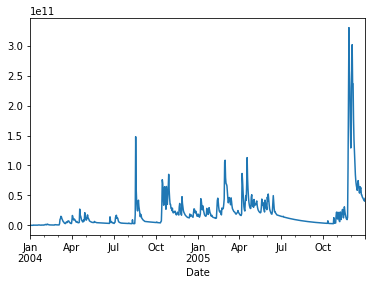

In [6]:
app.river.water.pp[["Coull"]].plot()